## HW 1: Math Foundation and Programming

This assignment intends to:
- Test your Python programming skills
- Understand gradients and backpropagation
- Think classical regression problems with a deep learning mind

- Suppose you have a model $$\hat{y} = \sigma(z)$$ where: 
    - $z= w^T x + b,  ~i.e.~  z = w_1*x_1 + w_2*x_2 + w_3*x_3 + w_4*x_4 + b$
    - $\sigma$ is the sigmoid function, i.e. $\sigma(z) = \frac{1}{(1+e^{-z})}$, and
    - $w, b$ are parameters. $b$ is a scalar, $x,w~\in R^4$, specifically, $w = [w_1, w_2, w_3, w_4]^T$, $x = [x_1, x_2, x_3, x_4]^T$.
- Your ground truth lable $y=0~or~1$. With a sample $(x, y)$, You measure your model performance by two possible cost functions:
  - Squared error: $L=\frac{1}{2}(y-\hat{y})^2$
  - Cross entropy: $L=-[y*\ln{\hat{y}}+(1-y)*ln{(1-\hat{y})}]$



Following the instruction below to program your solution in Python notebook step by step carefully:

**Q1**. Write a function to calculate each of the following partial derivatives. The inputs to the function can be all the variables in the model and the returned derivatives are expressions of these variables. An example is given below.
- `g_L_2_z(L, z, y, yhat, func)`: function to calculate $ \frac{\partial{L}}{\partial{z}}$. `func` is the name of the loss function
- `g_z_2_w(z, x, w )`: calculate $ \frac{\partial{z}}{\partial{w}}$
- `g_z_2_b(z, b )`: calculate $ \frac{\partial{z}}{\partial{b}}$

Note, these gradients are very simple. You really don't have to use gradient packages such as PyTorch.autograd. Just define each gradient as an expression of input variables.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
def g_z_2_b():
    return 1

def g_z_2_w(x): 
    return x
   
def g_L_2_z(y, yhat, func):
    if func=='CrossEntropy':
        dLdz = yhat - y
        return dLdz  
    else:
        dLdz = (yhat - y)*(1-yhat)*yhat # (yhat-y) * yhat * (1-yhat)
        return dLdz

**Q2**. Write a forward pass function `forward(x, w, b, func)` to calculate variables $z, \hat{y}, L$, with given $x, y, w, b$

In [ ]:
def forward(x,y, w, b, func):
    
    # add your code here
    z = w.T.dot(x) + b 
    yhat = 1/(1 + np.exp(-z))
    
    if func=='CrossEntropy':
        # L = (-y * np.log(yhat)) + ((1-y)* np.log(1-yhat))
        L = - (y * np.log(yhat) + (1 - y) * np.log(1 - yhat))
        return z, yhat, L 
    
    else:
        L = 0.5 * np.power((y - yhat), 2)
        return z, yhat, L

**Q3**. Write a function `gradient_desc (v, g, lr)` to adjust a parameter value $v$ by its gradient $g$, i.e. return the new value of parameter $v$ as $v$ $\leftarrow$ $v-lr*g$, where $lr$ is the learning rate.

In [ ]:
def gradient_desc(v, dev, lr):
    # add your code here
    v = v - (lr * dev)
    return v

**Q4**. Write a function `train(x, y, w_0, b_0, func, lr, n)` as follows:
   1. Initialize $w$, $b$ with w_0, b_0
   2. Use a loop of $n$ rounds to do the following
       1. Call the forward function you defined in Q2 to calculate $z, \hat{y}, L$ 
       2. Apply backpropagation to calculate the partial derivatives $\frac{\partial{L}}{\partial{w}}, \frac{\partial{L}}{\partial{b}}$ using the functions you defined in Q1.
       3. Update $w, b$ using the function `gradient_desc` you defined in Q3
       4. record $\hat{y}$, $L$
   3. Return the history of $\hat{y}$, and $L$

In [ ]:
def train(x, y, w0, b0, func, lr, n):
    
    Yhat = list()
    C = list()

    # add your code here
    for _ in range(n):
      z, yhat, l = forward(x, y, w0, b0, func)

      dldz = g_L_2_z(y, yhat, func)
      dzdw = g_z_2_w(x) 
      dldw = dldz * dzdw
      dldb = dldz * g_z_2_b()

      print(dldb)
      
      w0 = gradient_desc(w0, dldw, lr)
      b0 = gradient_desc(b0, dldb, lr)
      
      Yhat.append(yhat)
      C.append(l)
        
    return Yhat, C

**Q5**. Test your program with these two test cases and plot the history of loss $L$ (i.e. learning curves) under different loss functions. An example plot for case A has been given.
   
    


**Case A**: $x=[1.0,0.5,-1.0, -2.0]^T, y=1, w_0=[-2,-2,1,2]^T, b_0=-1, lr = 0.01$

In [ ]:
# Case A:

x=np.array([1.0, 0.5, -1.0, -2.0])
y=1
w_0=np.array([-2,-2,1,2])
# w_0 = np.array([2,2])
b_0=-1
lr = 0.01
n = 500

In [ ]:
# SE_loss = list()
# CE_loss = list()
# SE_yhats = list()
# CE_yhats = list()

In [ ]:
# call functions
(CE_yhats, CE_loss) = train(x, y, w_0, b_0, "CrossEntropy", lr,n)
(SE_yhats, SE_loss) = train(x, y, w_0, b_0, "SquaredError", lr,n)

-9.0
-0.9998766054240138
-8.927508946106759
-0.9998673294573011
-8.855018564721105
-0.9998573563817628
-8.782528906383426
-0.9998466338386505
-8.710040025430125
-0.9998351055413857
-8.637551980278374
-0.999822710981645
-8.565064833732205
-0.999809385113567
-8.49257865331147
-0.9997950580144718
-8.42009351160542
-0.9997796545203652
-8.347609486652695
-0.9997630938343807
-8.275126662349702
-0.9997452891061739
-8.202645128889506
-0.9997261469801516
-8.130164983233444
-0.9997055671102584
-8.057686329617951
-0.9996834416388924
-7.985209280099131
-0.9996596546373467
-7.912733955137924
-0.9996340815049921
-7.840260484228811
-0.9996065883242269
-7.767789006575305
-0.9995770311680152
-7.695319671815623
-0.9995452553566145
-7.622852640802269
-0.9995110946598705
-7.550388086439429
-0.9994743704412098
-7.47792619458244
-0.9994348907392061
-7.405467165003849
-0.9993924492823285
-7.333011212430879
-0.9993468244321905
-7.260558567659545
-0.9992977780503263
-7.188109478750897
-0.9992450542832034
-7.11

Text(0.5, 1.0, 'Learning Curve')

Text(0.5, 0, 'Steps')

Text(0, 0.5, 'Loss')

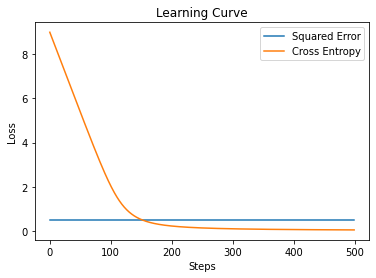

In [ ]:
steps = list(range(0, n))
plt.title("Learning Curve")
plt.xlabel('Steps')
plt.ylabel('Loss') 
plt.plot(steps , SE_loss, label = "Squared Error")
plt.plot(steps , CE_loss, label = "Cross Entropy")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Predictions')

Text(0.5, 0, 'Steps')

Text(0, 0.5, 'Yhat')

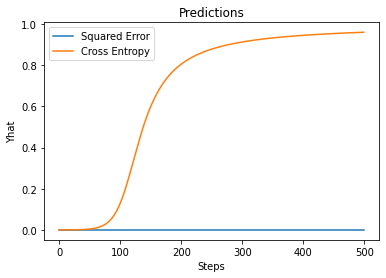

In [ ]:
steps = list(range(0, n))
plt.title("Predictions")
plt.xlabel('Steps')
# plt.ylim([-0.1, 1])
plt.ylabel('Yhat') 
plt.plot(steps , SE_yhats, label = "Squared Error")
plt.plot(steps , CE_yhats, label = "Cross Entropy")
plt.legend()
plt.show() 

**Case B**: $x=[-1.0,-0.5,-1.0, -2.0]^T, y=0, w_0=[-2,-2,1,-2]^T, b_0=-1,  lr = 0.01$

In [ ]:
# Case B: where y = 0

x=np.array([-1.0,-0.5,-1.0, -2.0])
y=0
w_0=np.array([-2,-2,1,-2])
b_0=-1
lr = 0.01
n = 500

In [ ]:
# SE_loss = list()
# CE_loss = list()
# SE_yhats = list()
# CE_yhats = list()

In [ ]:
(CE_yhats, CE_loss) = train(x, y, w_0, b_0, "CrossEntropy", lr,n)
(SE_yhats, SE_loss) = train(x, y, w_0, b_0, "SquaredError", lr,n)

Text(0.5, 1.0, 'Learning Curve')

Text(0.5, 0, 'Steps')

Text(0, 0.5, 'Loss')

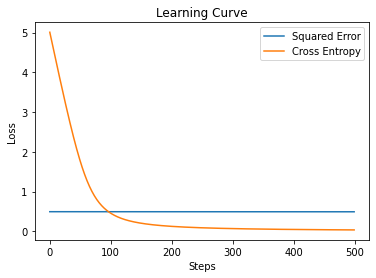

In [ ]:
steps = list(range(0, n))
plt.title("Learning Curve")
plt.xlabel('Steps')
plt.ylabel('Loss') 
plt.plot(steps , SE_loss, label = "Squared Error")
plt.plot(steps , CE_loss, label = "Cross Entropy")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Loss')

Text(0.5, 0, 'Steps')

Text(0, 0.5, 'Yhat')

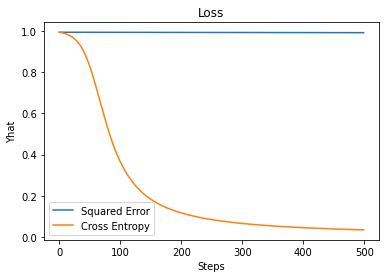

In [ ]:
steps = list(range(0, n))
plt.title("Loss")
plt.xlabel('Steps')
plt.ylabel('Yhat') 
plt.plot(steps , SE_yhats, label = "Squared Error")
plt.plot(steps , CE_yhats, label = "Cross Entropy")
plt.legend()
plt.show()

**Q6**. Carefully observe the learning curves under different loss functions. One difference you can find is the learning curves with Squared Error loss function are flat, shown little progress, and the prediction is alway far away from $y$. Can you explain the differences between these two curves in each plot? Write down your analysis below as markdowns.

- Cross-entropy is prefered for classification, while for regression mean squared error is one of the best choices.
- In classification we work with very particular set of possible output values thus MSE is badly defined
- Using cross entropy will lead to a convex function so chances of finding the optimal solution are high
- With cross entrophy loss tends to zero very quickly compared to MSE
- With MSE loss tends to zero after a very high number of iterations compared to cross entropy 
- This can be seen in the following graph


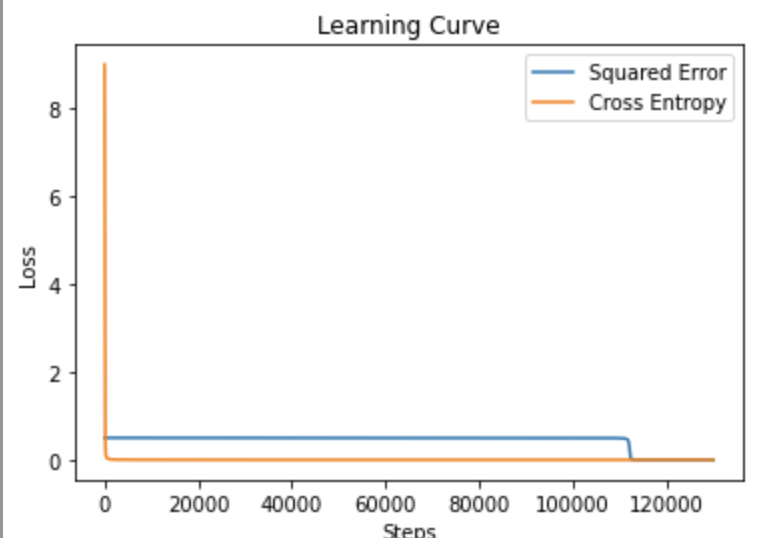

**Q7 (Bonus)**. In this experiment, we find that loss functions can have a big impact on the learning curves. Can you enumerate other two decisions or strategies that can improve the learning curves? Implement these strategies in this model and demonstrate their effects clearly. 

1. In this problem we have used sigmoid as the activation function, we can use ReLu for a better performance 
2. We can make use of dynamic learning rate instead of constant learning rate.
3. Bias can be updated in every iteration to get better accuracy


**In the following graphs, we can see how the Mean Squared error and the Cross Entropy vary with the and bias**


In [ ]:
def train(x, y, w0, b0, func, lr, n):
    
    Yhat = list()
    C = list()
    B = list()
    LR = list()

    # add your code here
    for _ in range(n):
      z, yhat, l = forward(x, y, w0, b0, func)
      dldz = g_L_2_z(y, yhat, func)
      dzdw = g_z_2_w(x)
      dldw = dldz * dzdw
      dldb = dldz * g_z_2_b()
      w0 = gradient_desc(w0, dldw, lr)
      b0 = gradient_desc(b0, dldb, lr)
      Yhat.append(yhat)
      C.append(l)
      B.append(b0)
      LR.append(lr) 
        
    return Yhat, C, B, LR

In [ ]:
SE_loss = list()
CE_loss = list()
SE_yhats = list()
CE_yhats = list()
SE_bias = list()
CE_bias = list()
SE_lr = list()
CE_lr = list()

In [ ]:
(CE_yhats, CE_loss, CE_bias, CE_lr) = train(x, y, w_0, b_0, "CrossEntropy", lr,n)
(SE_yhats, SE_loss, SE_bias, SE_lr) = train(x, y, w_0, b_0, "SquaredError", lr,n)

Text(0.5, 1.0, 'Bias vs Steps')

Text(0.5, 0, 'Steps')

Text(0, 0.5, 'Bias')

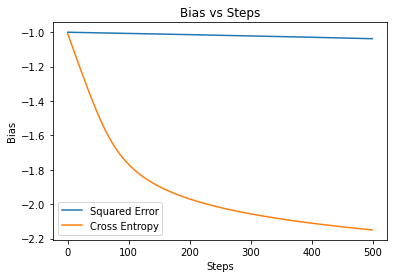

In [ ]:
steps = list(range(0, n))
plt.title("Bias vs Steps")
plt.xlabel('Steps')
plt.ylabel('Bias') 
plt.plot(steps , SE_bias, label = "Squared Error")
plt.plot(steps , CE_bias, label = "Cross Entropy")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Learning Rate vs Steps')

Text(0.5, 0, 'Steps')

Text(0, 0.5, 'Learning_rate')

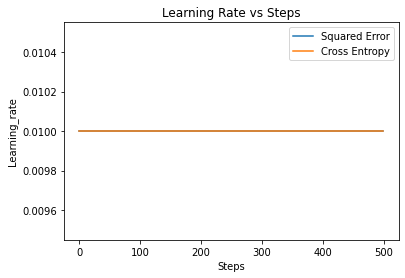

In [ ]:
steps = list(range(0, n))
plt.title("Learning Rate vs Steps")
plt.xlabel('Steps')
plt.ylabel('Learning_rate') 
plt.plot(steps , SE_lr, label = "Squared Error")
plt.plot(steps , CE_lr, label = "Cross Entropy")
plt.legend()
plt.show()